# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import os
import imageio
import json
from simplegen import SIMPLESequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.get_visible_devices('GPU')

2.0.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Functionality
Necessary funcionality is added here

In [3]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val  

# 6.10) Supervised Euclidean for SIMPLED with difference image and gradient
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [4]:
store_path = 'experiments/6_10_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 3))

# Training Preparation
Prepare the settings for training the model.

In [7]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True,
                           multi_channel='grad')

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une,
                                multi_channel='grad')

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [8]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\skimage\filters\rank\generic.py:119: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 163s 194ms/step - loss: 755.9079 - val_loss: 477.8638
Epoch 2/100
840/840 [==============================] - 150s 179ms/step - loss: 191.5001 - val_loss: 89.3899
Epoch 3/100
840/840 [==============================] - 132s 158ms/step - loss: 62.2317 - val_loss: 94.0575
Epoch 4/100
840/840 [==============================] - 152s 180ms/step - loss: 42.2581 - val_loss: 62.2709
Epoch 5/100
840/840 [==============================] - 157s 187ms/step - loss: 38.0869 - val_loss: 70.9921
Epoch 6/100
840/840 [==============================] - 147s 174ms/step - loss: 32.0374 - val_loss: 64.8964
Epoch 7/100
840/840 [==============================] - 140s 166ms/step - loss: 28.9761 - val_loss: 37.6842
Epoch 8/100
840/840 [==============================] - 131s 156ms/step - loss: 22.2836 - val_loss: 25.6810
Epoch 9/100
840/840 [==============================] - 140s 167ms/step - loss: 24.0317 - val_loss: 28.4430
Epoch 10/100
840/840 [========================

840/840 [==============================] - 128s 153ms/step - loss: 1.9972 - val_loss: 48.4677
Epoch 78/100
840/840 [==============================] - 140s 167ms/step - loss: 1.0165 - val_loss: 4.2636
Epoch 79/100
840/840 [==============================] - 129s 153ms/step - loss: 0.7735 - val_loss: 5.5512
Epoch 80/100
840/840 [==============================] - 140s 167ms/step - loss: 0.8318 - val_loss: 5.3623
Epoch 81/100
840/840 [==============================] - 134s 160ms/step - loss: 0.9436 - val_loss: 7.0772
Epoch 82/100
840/840 [==============================] - 136s 162ms/step - loss: 1.0078 - val_loss: 4.5592
Epoch 83/100
840/840 [==============================] - 127s 151ms/step - loss: 1.0349 - val_loss: 3.9165
Epoch 84/100
840/840 [==============================] - 141s 168ms/step - loss: 0.9599 - val_loss: 5.7883
Epoch 85/100
840/840 [==============================] - 128s 153ms/step - loss: 0.8202 - val_loss: 6.1340
Epoch 86/100
840/840 [==============================] - 14

# Evaluation
Evaluate the trained network

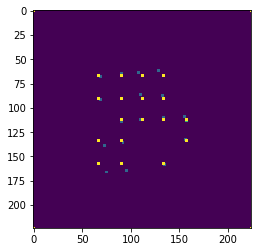

In [9]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.11) Supervised Euclidean for SIMPLED with L1 regularization
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [10]:
store_path = 'experiments/6_11_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [11]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [12]:
kernel_regularizer=tf.keras.regularizers.l1(0.01)

model = UNet(filters=32,
             layers=4,
             activation='linear',
             classes=2,
             input_shape=(224, 224, 1),
             kernel_regularizer=kernel_regularizer)

# Training Preparation
Prepare the settings for training the model.

In [13]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [14]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 74s 88ms/step - loss: 1459.2959 - val_loss: 1198.8641
Epoch 2/100
840/840 [==============================] - 65s 77ms/step - loss: 912.2209 - val_loss: 1253.3102
Epoch 3/100
840/840 [==============================] - 65s 77ms/step - loss: 837.3503 - val_loss: 855.2464
Epoch 4/100
840/840 [==============================] - 65s 78ms/step - loss: 673.2001 - val_loss: 818.4893
Epoch 5/100
840/840 [==============================] - 64s 77ms/step - loss: 307.1844 - val_loss: 588.2663
Epoch 6/100
840/840 [==============================] - 65s 78ms/step - loss: 242.7819 - val_loss: 614.4343
Epoch 7/100
840/840 [==============================] - 66s 78ms/step - loss: 200.8430 - val_loss: 260.6504
Epoch 8/100
840/840 [==============================] - 68s 80ms/step - loss: 160.5816 - val_loss: 163.9658
Epoch 9/100
840/840 [==============================] - 68s 81ms/step - loss: 160.3267 - val_loss: 575.6897
Epoch 10/100
840/840 [========================

840/840 [==============================] - 61s 73ms/step - loss: 54.0435 - val_loss: 71.3104
Epoch 78/100
840/840 [==============================] - 63s 75ms/step - loss: 54.4008 - val_loss: 292.4286
Epoch 79/100
840/840 [==============================] - 70s 84ms/step - loss: 54.3077 - val_loss: 75.3710
Epoch 80/100
840/840 [==============================] - 68s 81ms/step - loss: 54.3749 - val_loss: 124.5252
Epoch 81/100
840/840 [==============================] - 69s 82ms/step - loss: 53.6937 - val_loss: 72.0714
Epoch 82/100
840/840 [==============================] - 68s 81ms/step - loss: 53.7113 - val_loss: 89.7157
Epoch 83/100
840/840 [==============================] - 68s 81ms/step - loss: 55.3547 - val_loss: 69.5665
Epoch 84/100
840/840 [==============================] - 64s 76ms/step - loss: 53.2227 - val_loss: 72.5728
Epoch 85/100
840/840 [==============================] - 67s 80ms/step - loss: 53.4152 - val_loss: 347.5642
Epoch 86/100
840/840 [==============================] - 

# Evaluation
Evaluate the trained network

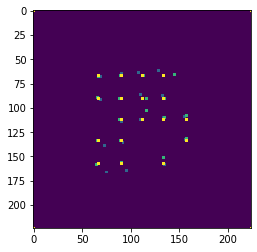

In [15]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.12) Supervised Euclidean for SIMPLED with L2 regularization
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [16]:
store_path = 'experiments/6_12_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [17]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [18]:
kernel_regularizer=tf.keras.regularizers.l2(0.01)

model = UNet(filters=32,
             layers=4,
             activation='linear',
             classes=2,
             input_shape=(224, 224, 1),
             kernel_regularizer=kernel_regularizer)

# Training Preparation
Prepare the settings for training the model.

In [19]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [20]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 75s 89ms/step - loss: 883.9207 - val_loss: 667.9858
Epoch 2/100
840/840 [==============================] - 66s 78ms/step - loss: 662.1973 - val_loss: 645.9089
Epoch 3/100
840/840 [==============================] - 64s 77ms/step - loss: 639.1671 - val_loss: 640.7653
Epoch 4/100
840/840 [==============================] - 68s 81ms/step - loss: 285.1208 - val_loss: 154.2659
Epoch 5/100
840/840 [==============================] - 66s 78ms/step - loss: 133.4066 - val_loss: 1384.4052
Epoch 6/100
840/840 [==============================] - 67s 80ms/step - loss: 116.9462 - val_loss: 108.2280
Epoch 7/100
840/840 [==============================] - 67s 79ms/step - loss: 116.8532 - val_loss: 101.6094
Epoch 8/100
840/840 [==============================] - 66s 79ms/step - loss: 93.1858 - val_loss: 98.2143
Epoch 9/100
840/840 [==============================] - 67s 80ms/step - loss: 106.8768 - val_loss: 94.1457
Epoch 10/100
840/840 [=============================

840/840 [==============================] - 66s 78ms/step - loss: 20.7696 - val_loss: 49.6132
Epoch 79/100
840/840 [==============================] - 66s 79ms/step - loss: 26.3274 - val_loss: 672.9237
Epoch 80/100
840/840 [==============================] - 67s 79ms/step - loss: 20.2486 - val_loss: 53.3559
Epoch 81/100
840/840 [==============================] - 69s 83ms/step - loss: 19.8564 - val_loss: 64.9852
Epoch 82/100
840/840 [==============================] - 68s 81ms/step - loss: 23.3937 - val_loss: 65.0900
Epoch 83/100
840/840 [==============================] - 70s 83ms/step - loss: 21.1907 - val_loss: 47.4962
Epoch 84/100
840/840 [==============================] - 67s 80ms/step - loss: 20.3315 - val_loss: 47.3728
Epoch 85/100
840/840 [==============================] - 65s 78ms/step - loss: 21.3728 - val_loss: 45.1840
Epoch 86/100
840/840 [==============================] - 81s 96ms/step - loss: 22.7118 - val_loss: 50.2110
Epoch 87/100
840/840 [==============================] - 14

# Evaluation
Evaluate the trained network

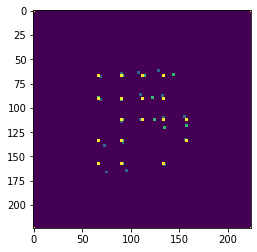

In [21]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.13) Supervised Euclidean for SIMPLED with SGD
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [22]:
store_path = 'experiments/6_13_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [23]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [24]:
model = UNet(filters=32,
             layers=4,
             activation='linear',
             classes=2,
             input_shape=(224, 224, 1),
             kernel_regularizer=None)

# Training Preparation
Prepare the settings for training the model.

In [25]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

optimizer= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.99)
model.compile(optimizer=optimizer, loss = utils.msed_loss)

# Training
Run the training.

In [26]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 72s 85ms/step - loss: inf - val_loss: inf
Epoch 2/100
840/840 [==============================] - 63s 76ms/step - loss: inf - val_loss: inf
Epoch 3/100
840/840 [==============================] - 67s 80ms/step - loss: inf - val_loss: inf
Epoch 4/100
840/840 [==============================] - 65s 78ms/step - loss: inf - val_loss: inf
Epoch 5/100
840/840 [==============================] - 66s 79ms/step - loss: inf - val_loss: inf
Epoch 6/100
840/840 [==============================] - 64s 77ms/step - loss: inf - val_loss: inf
Epoch 7/100
840/840 [==============================] - 64s 76ms/step - loss: inf - val_loss: inf
Epoch 8/100
840/840 [==============================] - 66s 78ms/step - loss: inf - val_loss: inf
Epoch 9/100
840/840 [==============================] - 64s 76ms/step - loss: inf - val_loss: inf
Epoch 10/100
840/840 [==============================] - 66s 79ms/step - loss: inf - val_loss: inf
Epoch 11/100
840/840 [===================

840/840 [==============================] - 62s 73ms/step - loss: inf - val_loss: inf
Epoch 85/100
840/840 [==============================] - 65s 78ms/step - loss: inf - val_loss: inf
Epoch 86/100
840/840 [==============================] - 65s 78ms/step - loss: inf - val_loss: inf
Epoch 87/100
840/840 [==============================] - 63s 75ms/step - loss: inf - val_loss: inf
Epoch 88/100
840/840 [==============================] - 66s 79ms/step - loss: inf - val_loss: inf
Epoch 89/100
840/840 [==============================] - 63s 75ms/step - loss: inf - val_loss: inf
Epoch 90/100
840/840 [==============================] - 63s 76ms/step - loss: inf - val_loss: inf
Epoch 91/100
840/840 [==============================] - 66s 79ms/step - loss: inf - val_loss: inf
Epoch 92/100
840/840 [==============================] - 64s 76ms/step - loss: inf - val_loss: inf
Epoch 93/100
840/840 [==============================] - 61s 72ms/step - loss: inf - val_loss: inf
Epoch 94/100
840/840 [===========

# Evaluation
Evaluate the trained network

OverflowError: cannot convert float infinity to integer

C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\numpy\ma\core.py:711: UserWarning: Warning: converting a masked

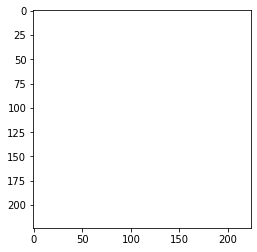

In [27]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)